# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keysECC import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [36]:
#test api key
weather_api_key

'af1d55f6db5df9bade447de3fcdbaef8'

### Generate the Cities List by Using the `citipy` Library

In [37]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations, using numpy random number generator
# zip= concatenates lon/lat coordinate combos
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination (using for loop to iterate over lat/long list)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


In [38]:
cities

['bredasdorp',
 'papatowai',
 'neya',
 'adamstown',
 'keflavik',
 'burang',
 'bilibino',
 'korhogo',
 'amungan',
 'waitangi',
 'salalah',
 'iqaluit',
 'port-aux-francais',
 'xai-xai',
 'dudinka',
 "oltinko'l",
 'badger',
 'kodiak',
 'auki',
 'cole harbour',
 'ayora',
 'albany',
 'uturoa',
 'tralee',
 'qaqortoq',
 'holualoa',
 'wailua homesteads',
 'whitehorse',
 'shiyan',
 'ulsteinvik',
 'hawaiian paradise park',
 'caxito',
 'new norfolk',
 'blackmans bay',
 'pitimbu',
 'necochea',
 'papao',
 'aykhal',
 'kimbe',
 'fuvahmulah',
 'harper',
 'port alfred',
 'san luis de la loma',
 'ribeira grande',
 'avarua',
 'lae',
 'mazagao',
 'ushuaia',
 'edinburgh of the seven seas',
 'puerto aysen',
 'ilulissat',
 'kushtia',
 'udachny',
 'izyaslav',
 'gulf shores',
 'hithadhoo',
 'nantucket',
 'argo',
 'isle of lewis',
 'yellowknife',
 'portland',
 'piscu',
 'mount gambier',
 'howard springs',
 'dehri',
 'puerto natales',
 'grytviken',
 'jamestown',
 'taiohae',
 'invercargill',
 'cockburn town',
 'b

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
#testing ability to pull data from API for a single city
city_name= 'durham'
API_key= weather_api_key

#generate url by passing api key, city, and units as imperial (temperature in farenheit) 
url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_key}&units=imperial"

print(url)

https://api.openweathermap.org/data/2.5/weather?q=durham&appid=af1d55f6db5df9bade447de3fcdbaef8&units=imperial


In [40]:
# Set the API base URL
API_key= weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | neya
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | burang
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | korhogo
Processing Record 9 of Set 1 | amungan
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | xai-xai
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | oltinko'l
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | auki
Processing Record 20 of Set 1 | cole harbour
Processing Record 21 of Set 1 | ayora
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | uturoa
Processing Reco

In [41]:
#viewing results of API call as JSON
city_data

[{'City': 'bredasdorp',
  'Lat': -34.5322,
  'Lng': 20.0403,
  'Max Temp': 63.77,
  'Humidity': 76,
  'Cloudiness': 100,
  'Wind Speed': 3.98,
  'Country': 'ZA',
  'Date': 1700369953},
 {'City': 'papatowai',
  'Lat': -46.5619,
  'Lng': 169.4708,
  'Max Temp': 55.53,
  'Humidity': 61,
  'Cloudiness': 22,
  'Wind Speed': 9.46,
  'Country': 'NZ',
  'Date': 1700369953},
 {'City': 'neya',
  'Lat': 58.2972,
  'Lng': 43.8681,
  'Max Temp': 18.09,
  'Humidity': 72,
  'Cloudiness': 60,
  'Wind Speed': 6.55,
  'Country': 'RU',
  'Date': 1700369954},
 {'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 71.24,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind Speed': 21.16,
  'Country': 'PN',
  'Date': 1700369954},
 {'City': 'keflavik',
  'Lat': 64.0049,
  'Lng': -22.5624,
  'Max Temp': 32.43,
  'Humidity': 86,
  'Cloudiness': 0,
  'Wind Speed': 8.05,
  'Country': 'IS',
  'Date': 1700369955},
 {'City': 'burang',
  'Lat': 30.25,
  'Lng': 81.1667,
  'Max Temp': 38.25,
  'Humidity'

In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,63.77,76,100,3.98,ZA,1700369953
1,papatowai,-46.5619,169.4708,55.53,61,22,9.46,NZ,1700369953
2,neya,58.2972,43.8681,18.09,72,60,6.55,RU,1700369954
3,adamstown,-25.0660,-130.1015,71.24,87,100,21.16,PN,1700369954
4,keflavik,64.0049,-22.5624,32.43,86,0,8.05,IS,1700369955


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 562
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        563 non-null    object 
 1   Lat         563 non-null    float64
 2   Lng         563 non-null    float64
 3   Max Temp    563 non-null    float64
 4   Humidity    563 non-null    int64  
 5   Cloudiness  563 non-null    int64  
 6   Wind Speed  563 non-null    float64
 7   Country     559 non-null    object 
 8   Date        563 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 44.0+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

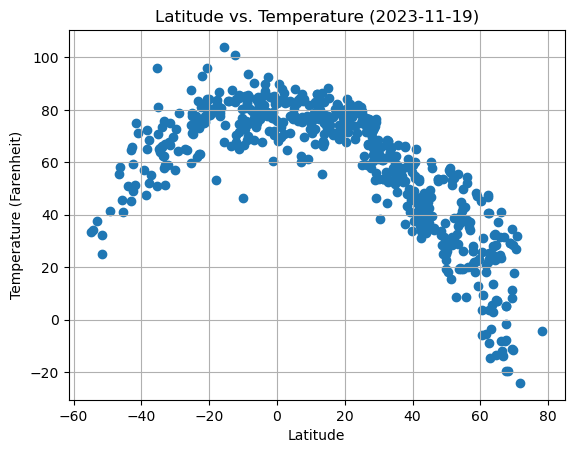

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

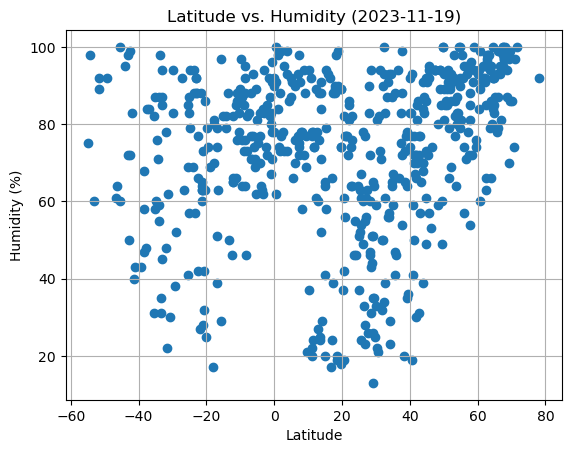

In [47]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

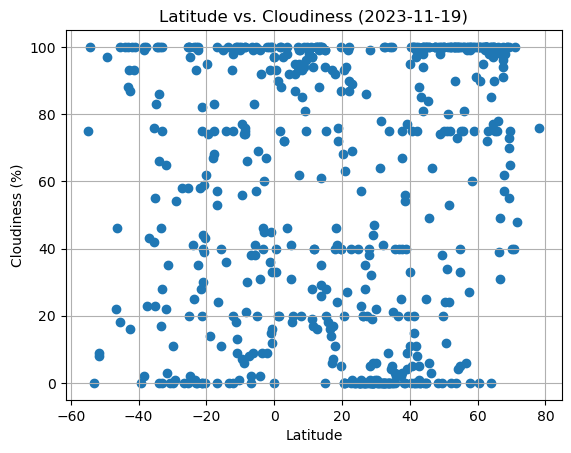

In [48]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

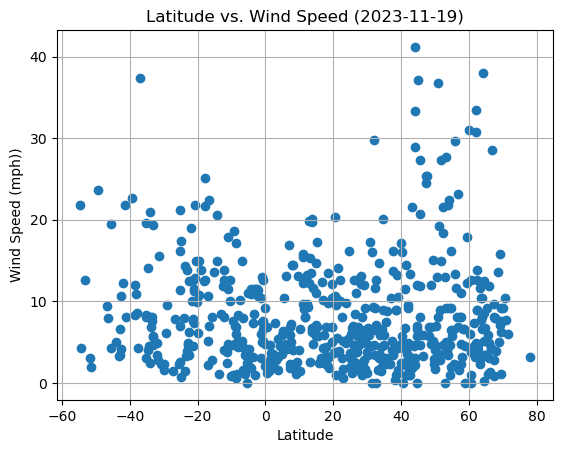

In [49]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html


In [50]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, y_label, Title, coordinates):

    # Run linear regression within the function
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(linear_equation,(coordinates),fontsize=15,color="red")

    # Label plot
    plt.xlabel('Hemisphere Latitude')
    plt.ylabel(y_label)
    plt.title(Title)

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

  

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,neya,58.2972,43.8681,18.09,72,60,6.55,RU,1700369954
4,keflavik,64.0049,-22.5624,32.43,86,0,8.05,IS,1700369955
5,burang,30.2500,81.1667,38.25,22,1,6.67,CN,1700369955
6,bilibino,68.0546,166.4372,-19.68,100,98,3.87,RU,1700369956
7,korhogo,9.4500,-5.6333,76.24,77,96,2.53,CI,1700369957


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,63.77,76,100,3.98,ZA,1700369953
1,papatowai,-46.5619,169.4708,55.53,61,22,9.46,NZ,1700369953
3,adamstown,-25.0660,-130.1015,71.24,87,100,21.16,PN,1700369954
9,waitangi,-43.9535,-176.5597,50.83,95,100,5.01,NZ,1700369958
12,port-aux-francais,-49.3500,70.2167,41.25,92,97,23.69,TF,1700369959


###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
R squared: 0.45918320073925256


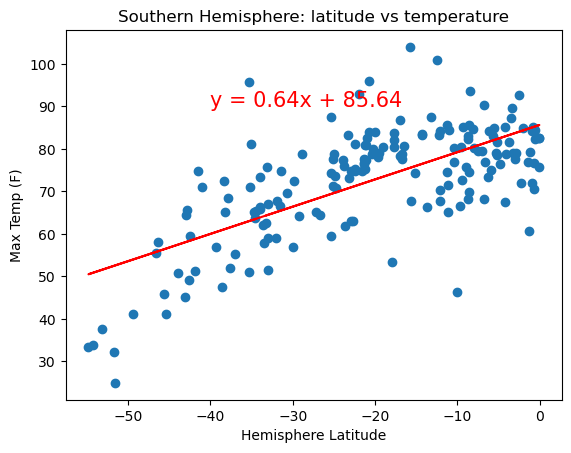

In [53]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
Title= "Southern Hemisphere: latitude vs temperature"
y_label= "Max Temp (F)"
linear_regression_plot(x_values, y_values, y_label, Title , (-40,90) )

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
R squared: 0.7731430045530526


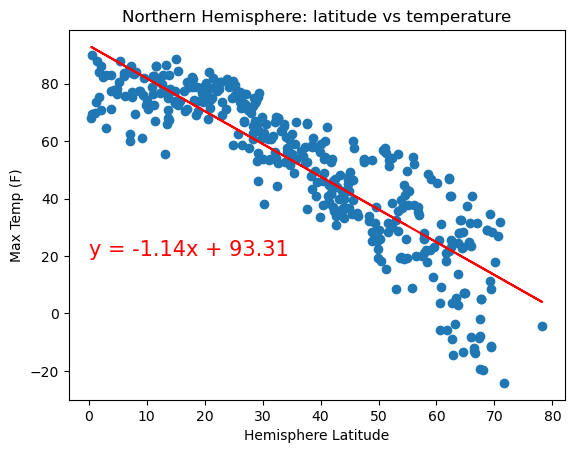

In [54]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
Title= "Northern Hemisphere: latitude vs temperature"
y_label= "Max Temp (F)"
linear_regression_plot(x_values, y_values, y_label, Title , (0,20) )


**Discussion about the linear relationship:** A strong correlation between latitude and maximum temperature is present in Southern Hemisphere relative to the Northern Hemisphere, indicted by an R-square value closer to 1.Additionally, the closer the equator the higher the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
R squared: 0.02576441143022781


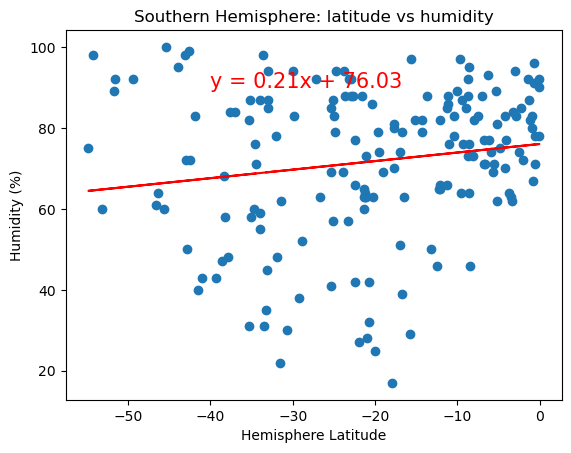

In [55]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]
Title= "Southern Hemisphere: latitude vs humidity"
y_label= "Humidity (%)"
linear_regression_plot(x_values, y_values, y_label, Title , (-40,90) )

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
R squared: 0.11203846466668725


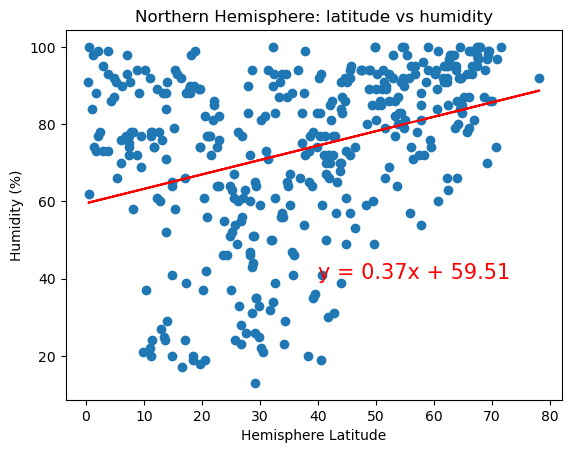

In [56]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
Title= "Northern Hemisphere: latitude vs humidity"
y_label= "Humidity (%)"
linear_regression_plot(x_values, y_values, y_label, Title , (40,40) )


**Discussion about the linear relationship:** The relationship between humidity and latitude is weakly correlated in both the Northern and Southern Hemispheres, as indicated with the R-square values that are quite small/far from 1.

### Cloudiness vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
R squared: 0.00045591239435809137


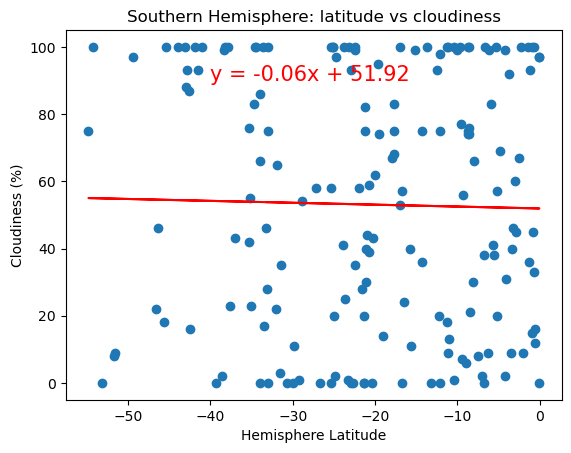

In [58]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
Title= "Southern Hemisphere: latitude vs cloudiness"
y_label= "Cloudiness (%)"
linear_regression_plot(x_values, y_values, y_label, Title , (-40,90) )

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
R squared: 0.041320502750413664


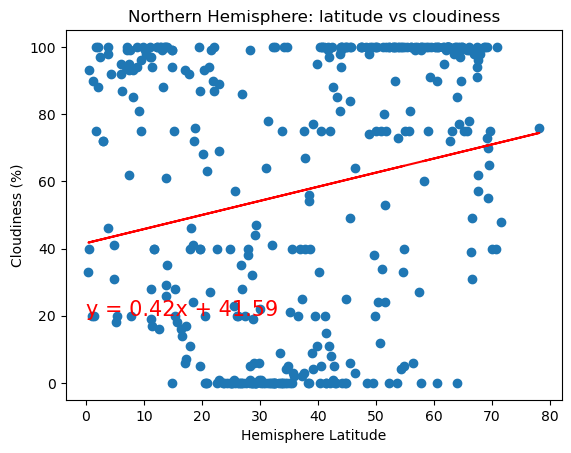

In [59]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
Title= "Northern Hemisphere: latitude vs cloudiness"
y_label= "Cloudiness (%)"
linear_regression_plot(x_values, y_values, y_label, Title , (0,20) )


**Discussion about the linear relationship:** The relationship between cloudiness and latitude is weakly correlated in both the Northern and Southern Hemispheres, as indicated with the R-square values that are quite small/far from 1.

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
R squared: 0.025059855386136944


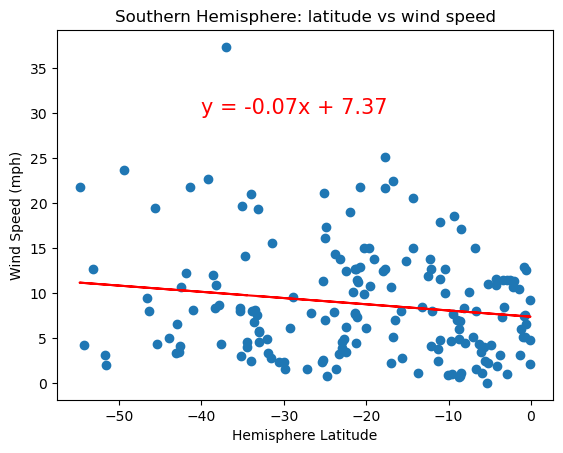

In [60]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]
Title= "Southern Hemisphere: latitude vs wind speed"
y_label= 'Wind Speed (mph)'
linear_regression_plot(x_values, y_values, y_label, Title , (-40,30) )

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
R squared: 0.7731430045530526


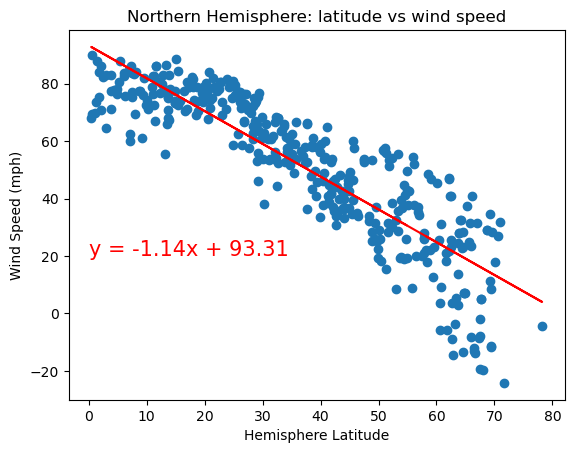

In [61]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
Title= "Northern Hemisphere: latitude vs wind speed"
y_label= "Wind Speed (mph)"
linear_regression_plot(x_values, y_values, y_label, Title , (0,20) )


**Discussion about the linear relationship:** The relationship between windspeed and latitude is weakly correlated in the Southern Hemisphere with an r-square value of .025, whereas in the Northern Hemisphere there is a relatively strong correlation with an r-square value of .77.